# Демонстрация автоматического расчета важностей RandomForestClassifier

In [1]:
# расширяем поле, убираем предупреждения
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:95% !important;}</style>'))

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Стандартные библиотеки для анализа
import pandas as pd
pd.options.display.float_format = '{:20,.2f}'.format

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pylab as pl

In [3]:
import sys
sys.path.append('../')

# Наша разработанная библиотека
from autobinary import SentColumns, CatBoostEncoder, AutoTrees, base_pipe

In [4]:
import sklearn as sk
import xgboost as xgb
import matplotlib as mplot
import autobinary as ab

print('sklearn: ', sk.__version__)
print('xgboost: ', xgb.__version__)
print('matplotlib: ', mplot.__version__)
print('autobinary: ', ab.__version__)

sklearn:  0.24.2
xgboost:  1.5.2
matplotlib:  3.1.0
autobinary:  1.0.4


In [5]:
sample = pd.read_csv('../data/train_titanic.csv')

print('Размерность данных:', sample.shape)
sample.head(2)

Размерность данных: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C


In [6]:
num_columns = [
    'Age', 'Fare'
]

cat_columns = [
    'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch'
]

target = ['Survived']

In [7]:
X_train, X_val, y_train, y_val = train_test_split(
    sample[num_columns+cat_columns],
    sample[target],
    test_size=0.3,
    stratify=sample[target],
    random_state=42
)

In [8]:
prep_pipe = base_pipe(
    num_columns=num_columns, 
    cat_columns=cat_columns, 
    kind='all')

In [9]:
params = {
    'criterion':'gini',
    'max_depth':5,
    'random_state':42,
    'n_estimators':50}

fit_params = {}

rf_model = RandomForestClassifier(**params)

# задаем стратегию проверки
strat = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42)

In [10]:
model = AutoTrees(
    main_estimator=rf_model, 
    main_fit_params=fit_params,
    main_prep_pipe = prep_pipe,
    main_features=num_columns+cat_columns,
    
    X_train=X_train,
    y_train=y_train,
    
    main_metric='gini',
    model_type = 'randomforest')

In [11]:
model.model_fit_cv(strat=strat)

0it [00:00, ?it/s]

==================== Обучение 1 фолда! ====================


1it [00:00,  5.50it/s]

gini на обучающей выборке: 86.242
gini на проверочной выборке: 61.851

********************** 1 фолд обучен! ******************************


==================== Обучение 2 фолда! ====================


2it [00:00,  5.43it/s]

gini на обучающей выборке: 84.622
gini на проверочной выборке: 72.971

********************** 2 фолд обучен! ******************************


==================== Обучение 3 фолда! ====================


4it [00:00,  4.57it/s]

gini на обучающей выборке: 85.622
gini на проверочной выборке: 68.642

********************** 3 фолд обучен! ******************************


==================== Обучение 4 фолда! ====================
gini на обучающей выборке: 83.671
gini на проверочной выборке: 77.950

********************** 4 фолд обучен! ******************************


==================== Обучение 5 фолда! ====================


5it [00:01,  4.76it/s]

gini на обучающей выборке: 84.244
gini на проверочной выборке: 79.194

********************** 5 фолд обучен! ******************************




In [12]:
model.get_mean_cv_scores()

72.12139845503506

In [13]:
model.get_extra_scores()

,names,fold_1,fold_2,fold_3,fold_4,fold_5
0,roc_train,0.93,0.92,0.93,0.92,0.92
1,roc_valid,0.81,0.86,0.84,0.89,0.90
2,gini_train,86.24,84.62,85.62,83.67,84.24
3,gini_valid,61.85,72.97,68.64,77.95,79.19


In [14]:
fi = model.get_fi()
fi

,index,importance 0,importance 1,importance 2,importance 3,importance 4,mean_importance
0,Sex,0.39,0.34,0.36,0.34,0.39,0.36
1,Fare,0.21,0.24,0.26,0.22,0.22,0.23
2,Pclass,0.13,0.15,0.11,0.15,0.10,0.13
3,Age,0.10,0.11,0.10,0.10,0.13,0.11
4,Parch,0.06,0.07,0.07,0.06,0.07,0.07
5,SibSp,0.07,0.06,0.06,0.07,0.06,0.06
6,Embarked,0.04,0.04,0.04,0.05,0.04,0.04


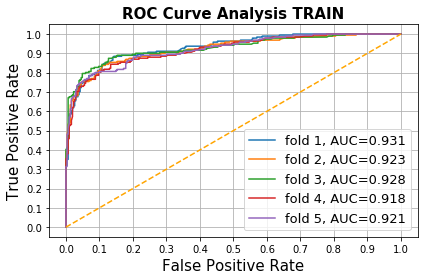

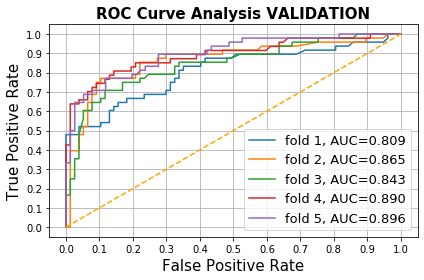

In [15]:
model.get_rocauc_plots()